In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure
from pathlib import Path
import os
import wave
import keras
import seaborn as sns
import librosa
import soundfile as sf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from numpy import mean
from numpy import std
from numpy import dstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from scipy.io import wavfile
from tqdm import tqdm
import tensorflow as tf



import scipy.io
import tensorflow.keras.backend as K
# import tensorflow_addons as tfa
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.optimizers.legacy import Adam
# from tensorflow.keras import layers
# from tensorflow.keras.activations import gelu
from keras.callbacks import EarlyStopping
from tensorflow.python.keras.models import Sequential,Input,Model
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import _LRScheduler
import wave,struct

In [ ]:
import torch

In [ ]:
from glob import glob
import pandas as pd

In [ ]:
y=[]
sr=[]


paths=glob('/content/gdrive/MyDrive/sad_sorrow/data/passage_1/*.wav')

In [ ]:
paths_arr=np.array(paths)

In [ ]:
paths_arr_sort=np.sort(paths_arr)

In [ ]:
paths_arr_sort

array(['/content/gdrive/MyDrive/sad_sorrow/data/passage_1/01_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/02_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/03_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/04_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/05_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/06_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/07_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/08_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/09_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/10_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/11_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/12_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/13_P1.wav',
       '/content/gdrive/MyDrive/sad_sorrow/data/passage_1/14_P1.wav',
       '/content/gdr

In [ ]:
audio_data=[]
# sr=[]
for files in paths_arr_sort:
    audio_file,sr=librosa.load(files, sr=16000)

    audio_data.append(audio_file)


In [ ]:
print(len(audio_data))
print(sr)


64
16000


In [ ]:
audio_data_col=[]

for i in range (len(audio_data)):
    audio_data_col.append(np.transpose(audio_data[i]))

print(audio_data[5].shape)
audio_data_col[5].shape

(527006,)


(527006,)

In [ ]:
audio_data[5]

array([ 8.3988363e-07, -6.1272540e-06, -3.0573978e-05, ...,
        5.3688255e-03,  4.2012953e-03,  3.0546230e-03], dtype=float32)

In [ ]:
audio_paths = []
for i in range(1, 65):

    audio_paths.append(f"./data/passage_1/0{i}_P1.wav")

In [ ]:
print(audio_paths)

['./data/passage_1/01_P1.wav', './data/passage_1/02_P1.wav', './data/passage_1/03_P1.wav', './data/passage_1/04_P1.wav', './data/passage_1/05_P1.wav', './data/passage_1/06_P1.wav', './data/passage_1/07_P1.wav', './data/passage_1/08_P1.wav', './data/passage_1/09_P1.wav', './data/passage_1/010_P1.wav', './data/passage_1/011_P1.wav', './data/passage_1/012_P1.wav', './data/passage_1/013_P1.wav', './data/passage_1/014_P1.wav', './data/passage_1/015_P1.wav', './data/passage_1/016_P1.wav', './data/passage_1/017_P1.wav', './data/passage_1/018_P1.wav', './data/passage_1/019_P1.wav', './data/passage_1/020_P1.wav', './data/passage_1/021_P1.wav', './data/passage_1/022_P1.wav', './data/passage_1/023_P1.wav', './data/passage_1/024_P1.wav', './data/passage_1/025_P1.wav', './data/passage_1/026_P1.wav', './data/passage_1/027_P1.wav', './data/passage_1/028_P1.wav', './data/passage_1/029_P1.wav', './data/passage_1/030_P1.wav', './data/passage_1/031_P1.wav', './data/passage_1/032_P1.wav', './data/passage_

appling STFT

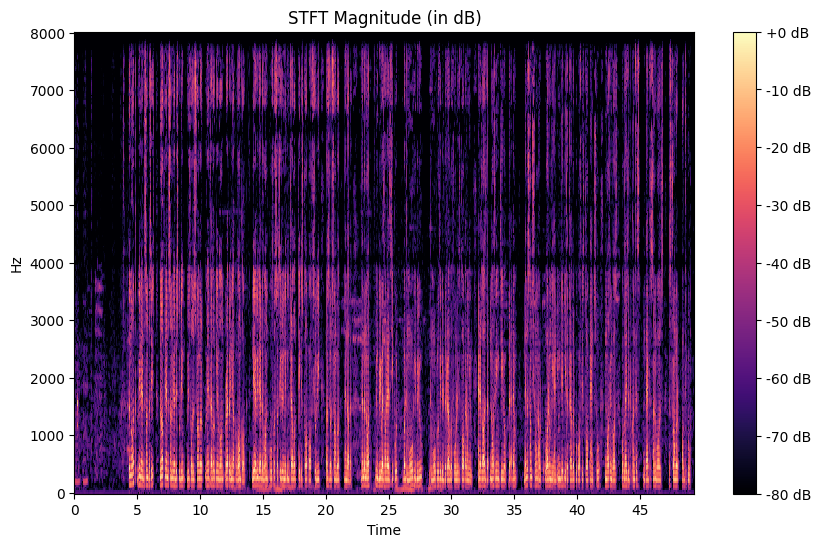

In [ ]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

# Initialize an empty list to store all the spectrograms
spectrograms = []

# Loop over the first 64 audio files
for idx in range(64):
    # Load the audio file
    audio_path = paths_arr_sort[idx]
    y, sr = librosa.load(audio_path, sr=16000)  # y is the audio time series, sr is the sample rate

    # Apply Short-Time Fourier Transform (STFT)
    n_fft = 512      # Length of the FFT window
    hop_length = 160 # Number of samples between successive frames
    win_length = 400 # Each frame of audio is windowed before FFT with a window length
    stft_result = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window='hann')

    # Compute the magnitude of the STFT (abs to get rid of the imaginary part)
    magnitude_spectrogram = np.abs(stft_result)

    # Optionally, convert to decibels (log scale for better visualization)
    db_spectrogram = librosa.amplitude_to_db(magnitude_spectrogram, ref=np.max)

    # Append the spectrogram to the list
    spectrograms.append(db_spectrogram)

    # Optionally, you can visualize each spectrogram
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(db_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'STFT Magnitude (in dB) - File {idx + 1}')
    plt.show()

# Now `spectrograms` is a list containing the STFT magnitude spectrograms for all 64 files.
# Each entry is a 2D array (spectrogram) for the corresponding file.


In [ ]:
# import numpy as np
# import librosa
# import librosa.display

# # Parameters
# n_fft = 512
# hop_length = 160
# win_length = 400
# sr = 16000  # Sample rate

# # Simulate an input signal (batch size, signal_length, channels)
# batch_size = 1
# signal_length = 16000
# channels = 1

# # Example input signal of shape (batch_size, signal_length, channels)
# signal = np.random.randn(batch_size, signal_length, channels)

# # Apply STFT for each channel
# # stft_output = []
# for i in range(channels):
#     stft_batch = []
#     for sig in signal:
#         sig = sig.squeeze()  # Remove the channel dimension for librosa
#         stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
#         stft_magnitude = np.abs(stft)  # Get magnitude
#         stft_batch.append(stft_magnitude)

#     stft_output.append(np.array(stft_batch))

# # Convert list to numpy array and reshape to desired output shape
# stft_output = np.stack(stft_output, axis=-1)  # (batch_size, frequency_bins, time_frames, channels)

# # Output shape should be (None, 100, 257, 1)
# print("STFT output shape:", stft_output.shape)


appling the magnitude

In [ ]:
# import numpy as np
# import librosa

# # Parameters for STFT
# n_fft = 512
# hop_length = 160
# win_length = 400
# sr = 16000  # Sample rate

# # Example signal (1 second of audio, sampled at 16,000 Hz)
# signal_length = 16000
# signal = np.random.randn(signal_length)

# # Apply STFT
# stft_result = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length, win_length=win_length)

# # Calculate the magnitude (absolute value) of the complex STFT result
# magnitude = np.abs(stft_result)

# # Output shape of the magnitude
# print("STFT magnitude shape:", magnitude.shape)  # Should be (257, 100)


In [ ]:
import torch
import torch.nn as nn

class MagnitudeLayer(nn.Module):
    def __init__(self):
        super(MagnitudeLayer, self).__init__()

    def forward(self, x):
        # x is expected to be complex, with a shape of (batch, frames, freq_bins, 2)
        # Last dimension = 2 (for real and imaginary parts)
        real = x[..., 0]  # Real part
        imag = x[..., 1]  # Imaginary part

        # Magnitude = sqrt(real^2 + imag^2)
        magnitude = torch.sqrt(real**2 + imag**2)

        # Adding a channel dimension at the end (to match output shape (batch, frames, freq_bins, 1))
        return magnitude.unsqueeze(-1)

# Initialize magnitude layer
magnitude_layer = MagnitudeLayer()

# Define batch size, number of frames, and frequency bins
batch_size = 1
num_frames = 100
num_freq_bins = 257

# Initialize a list to store magnitude outputs
magnitude_outputs = []

# Loop over 64 data points
for idx in range(64):
    # Simulate STFT output for each of the 64 data points
    # Input shape: (batch_size, num_frames, num_freq_bins, 2) for real and imaginary components
    stft_output = torch.randn(batch_size, num_frames, num_freq_bins, 2)

    # Apply magnitude computation for each STFT output
    magnitude_output = magnitude_layer(stft_output)

    # Store the result in the list
    magnitude_outputs.append(magnitude_output)

    # Optionally, print the shape of each magnitude output
    print(f"Magnitude output shape for data point {idx + 1}: {magnitude_output.shape}")

# Now `magnitude_outputs` contains the magnitude outputs for all 64 data points


appling filter bank layer

In [ ]:
import torch
import torch.nn as nn
import librosa
import numpy as np

class FilterBankLayer(nn.Module):
    def __init__(self, sample_rate=16000, n_mels=128, n_fft=512):
        super(FilterBankLayer, self).__init__()

        # Generate the Mel filter bank matrix using librosa
        mel_filters = librosa.filters.mel(sr=sample_rate, n_fft=n_fft, n_mels=n_mels)

        # Convert the filter bank to a torch tensor and make it non-trainable (fixed weights)
        self.mel_filters = torch.tensor(mel_filters, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        # Shape of mel_filters: (1, 1, n_mels, n_fft//2 + 1) to allow broadcasting

    def forward(self, x):
        # Input shape: (batch_size, time_frames, freq_bins, 1)
        # Remove the last channel dimension
        x = x.squeeze(-1)

        # Apply filter bank (matrix multiplication)
        # Permute the tensor to have shape (batch_size, time_frames, 1, freq_bins)
        x = x.permute(0, 2, 1)

        # Multiply by mel filter bank (output: (batch_size, n_mels, time_frames))
        mel_spectrogram = torch.matmul(self.mel_filters, x)

        # Permute back to shape (batch_size, time_frames, n_mels)
        mel_spectrogram = mel_spectrogram.permute(0, 2, 1)

        # Reshape to (batch_size, time_frames, n_mels, 1) for compatibility
        mel_spectrogram = mel_spectrogram.unsqueeze(-1)

        return mel_spectrogram

# Initialize the filter bank layer
filter_bank_layer = FilterBankLayer(sample_rate=16000, n_mels=128, n_fft=512)

# Example parameters
batch_size = 1
num_frames = 100
num_freq_bins = 257
channels = 1

# Initialize a list to store mel-spectrogram outputs
mel_outputs = []

# Loop over 64 data points
for idx in range(64):
    # Simulate a batch of STFT magnitudes for each data point
    stft_magnitude = torch.randn(batch_size, num_frames, num_freq_bins, channels)

    # Apply the filter bank layer
    mel_output = filter_bank_layer(stft_magnitude)

    # Store the mel-spectrogram output
    mel_outputs.append(mel_output)

    # Optionally print the shape of the mel-spectrogram output for each data point
    print(f"Mel-spectrogram output shape for data point {idx + 1}: {mel_output.shape}")

# Now `mel_outputs` contains the mel-spectrogram outputs for all 64 data points


decible layer

In [ ]:
import torch
import torch.nn as nn

class MagnitudeToDecibelLayer(nn.Module):
    def __init__(self, eps=1e-10):
        super(MagnitudeToDecibelLayer, self).__init__()
        self.eps = eps  # Small constant to avoid log(0)

    def forward(self, x):
        # Input x has shape (batch_size, num_frames, num_mel_bins, 1)

        # Remove the last channel dimension for calculation
        x = x.squeeze(-1)

        # Convert magnitude to decibel scale
        x = 10 * torch.log10(x**2 + self.eps)

        # Add the channel dimension back
        x = x.unsqueeze(-1)

        return x

# Initialize the decibel conversion layer
decibel_layer = MagnitudeToDecibelLayer()

# Example parameters
batch_size = 1
num_frames = 100
num_mel_bins = 128
channels = 1

# Initialize a list to store decibel outputs
decibel_outputs = []

# Loop over 64 data points
for idx in range(64):
    # Simulate a batch of filter bank magnitudes for each data point
    filter_bank_output = torch.abs(torch.randn(batch_size, num_frames, num_mel_bins, channels))

    # Apply the decibel conversion
    decibel_output = decibel_layer(filter_bank_output)

    # Store the decibel output
    decibel_outputs.append(decibel_output)

    # Optionally print the shape of the decibel output for each data point
    print(f"Decibel output shape for data point {idx + 1}: {decibel_output.shape}")

# Now `decibel_outputs` contains the decibel-converted outputs for all 64 data points


batch normalisation

In [ ]:
import torch
import torch.nn as nn

class DecibelWithBatchNormLayer(nn.Module):
    def __init__(self, eps=1e-10):
        super(DecibelWithBatchNormLayer, self).__init__()

        # Decibel conversion parameters
        self.eps = eps  # Small constant to avoid log(0)

        # Batch normalization layer (for 4D input)
        self.batch_norm = nn.BatchNorm2d(1)  # 1 because the channel dimension is 1

    def forward(self, x):
        # Input x has shape (batch_size, num_frames, num_mel_bins, 1)

        # Remove the last channel dimension for calculation (if required)
        x = x.squeeze(-1)

        # Convert magnitude to decibel scale
        x = 10 * torch.log10(x**2 + self.eps)

        # Add the channel dimension back for batch normalization
        x = x.unsqueeze(1)  # From (batch_size, num_frames, num_mel_bins) to (batch_size, 1, num_frames, num_mel_bins)

        # Apply batch normalization (along the time and mel dimensions)
        x = self.batch_norm(x)

        # Remove the newly added dimension for compatibility with the expected shape
        x = x.squeeze(1)  # Back to (batch_size, num_frames, num_mel_bins)

        # Add the last channel dimension back for output shape (batch_size, num_frames, num_mel_bins, 1)
        x = x.unsqueeze(-1)

        return x

# Initialize the decibel conversion layer with batch normalization
decibel_batchnorm_layer = DecibelWithBatchNormLayer()

# Example parameters
batch_size = 1
num_frames = 100
num_mel_bins = 128
channels = 1

# Initialize a list to store the outputs
all_outputs = []

# Loop over 64 data points
for idx in range(64):
    # Simulate a batch of filter bank magnitudes for each data point
    filter_bank_output = torch.abs(torch.randn(batch_size, num_frames, num_mel_bins, channels))

    # Apply the decibel conversion and batch normalization
    output = decibel_batchnorm_layer(filter_bank_output)

    # Store the output
    all_outputs.append(output)

    # Optionally, print the shape of the output for each data point
    print(f"Output shape for data point {idx + 1}: {output.shape}")

# Now `all_outputs` contains the processed outputs for all 64 data points


time disturbuted conv 1d layer

max pooling 2d

relu_1

max_pooling2

conv_relu_2

max_pooling_3

conv_relu_3

max_pool_4

conv_relu_4

global_max_pooling_2d

network

In [ ]:
class CNNNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=8,
                kernel_size=3,
                stride=1
            ),
            nn.Tanh()
            nn.Maxpool2d(kernel_size=2)

        self.conv2=nn.Sequential(
            nn.conv2d(
                in_channels=8,
                out_channels=16,
                kernel_size=3,
                stride=1
            ),
            nn.ReLU()
            nn.MaxPool2d(kaernel_size=2)
        )
        self.conv3=nn.Sequential(
            nn.conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=3,
                stride=1
            ),
            nn.ReLU()
            nn.MaxPool2d(kaernel_size=2)
            )
        self.conv4=nn.Sequential(
            nn.conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1
            ),
            nn.ReLU()
            nn.MaxPool2d(kaernel_size=2)
            )
        self.conv5=nn.Sequential(
            nn.conv2d(
                in_channels=64,
                out_channels=128,
                kernel_size=3,
                stride=1
            ),
            nn.ReLU()
            nn.MaxPool2d(kaernel_size=2)
            )
        def forward(self,x):
            x=self.conv1(x)
            x=self.conv2(x)
            x=self.conv3(x)
            x=self.conv4(x)
            x=self.conv5(x)

            embed=x
            x=self.linear(x)
            x=self.relu(x)
            x=self.dropout(x)
            logits=self.linear(x)
            predictions=self.output_1(logits)
            return predictions,embed
        )


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = CNNNetwork().to(device)

dropout

In [ ]:
import torch
import torch.nn as nn

# Define a simple model with a Dropout layer
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(p=0.5)  # Dropout with 50% probability
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout during training
        x = self.fc2(x)
        return x

# Example usage
model = SimpleModel()
input_data = torch.randn(16, 128)  # A batch of 16 samples with 128 features
output = model(input_data)


dense layer

In [ ]:
import torch
import torch.nn as nn

# Define a simple neural network with a dense layer
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(in_features=128, out_features=64)  # Dense layer

    def forward(self, x):
        x = self.fc1(x)  # Apply the dense layer
        return x

# Example usage
model = SimpleNN()
input_data = torch.randn(1, 128)  # Input with shape (1, 128)
output = model(input_data)

print("Output shape:", output.shape)  # Output shape should be (1, 64)


softmax layer

In [ ]:
import torch
import torch.nn as nn

# Define a simple model with a softmax layer
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(in_features=64, out_features=10)  # Dense layer
        self.softmax = nn.Softmax(dim=1)  # Softmax layer along the class dimension

    def forward(self, x):
        x = self.fc1(x)  # Apply the dense layer
        x = self.softmax(x)  # Apply softmax to get probabilities
        return x

# Example usage
model = SimpleNN()
input_data = torch.randn(1, 64)  # Input with shape (1, 64)
output = model(input_data)

print("Output shape:", output.shape)  # Output shape should be (1, 10)
print("Output probabilities:", output)


creating data loaders and data sets

In [ ]:
melspec_data_arr=np.zeros((64,len(all_outputs[0][0]),len(all_outputs[0][0])))
k=0

for i in range (len(all_outputs)):
    for j in range (len(all_outputs[i])):

        melspec_data_arr[k]=all_outputs[i][j]
        k+=1

In [ ]:
X=np.reshape(melspec_data_arr,(melspec_data_arr.shape[0],1,len(all_outputs[0][0]),len(all_outputs[0][0])))
Y=np.array(labels_final)

In [ ]:
X.shape

In [ ]:
# from sklearn.model_selection import train_test_split
def create_datasets(X, Y,test_size=0.15,seed=None):
#     X_train1, X_test, y_train1, y_test = train_test_split(X, Y, test_size=0.1,random_state=seed)


#     print(y_test.shape)
#     # print(snr_list_test.shape)

#     # X_train, X_valid, y_train, y_valid,snr_list_train, snr_list_valid = train_test_split(X_train1, y_train1,snr_list1, test_size=0.1,random_state=seed)
#     X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1, test_size=0.1,random_state=seed)


    X_total = [torch.tensor(arr, dtype=torch.float32) for arr in (all_outputs)]
    Y_total = [torch.tensor(arr, dtype=torch.long) for arr in (y_labels)]


    ttl_ds = TensorDataset(X_train, y_train)
    # valid_ds = TensorDataset(X_valid, y_valid)
    # test_ds= TensorDataset(X_test, y_test)



    return ttl_ds



In [ ]:
def create_loaders(train_ds, valid_ds, test_ds,bs, jobs=0):
    ttl_dl = DataLoader(ttl_ds, bs, shuffle=True, num_workers=jobs)
    # valid_dl = DataLoader(valid_ds, bs, shuffle=False, num_workers=jobs)
    # test_dl = DataLoader(test_ds, bs, shuffle=False, num_workers=jobs)

    # snr_list_train_dl = DataLoader(snr_list_train_ds, bs, shuffle=True, num_workers=jobs)
    # snr_list_valid_dl = DataLoader(snr_list_valid_ds, bs, shuffle=False, num_workers=jobs)
    # snr_list_test_dl = DataLoader(snr_list_test_ds, bs, shuffle=False, num_workers=jobs)
    return ttl_dl
    # ,snr_list_train_dl ,snr_list_valid_dl,snr_list_test_dl

In [ ]:
print('Preparing datasets')
ttl_ds  = create_datasets(X,Y,seed=25)
# snr_list_train_ds,snr_list_valid_ds,snr_list_test_ds

In [ ]:
bs = 128
print(f'Creating data loaders with batch size: {bs}')
ttl_dl = create_loaders(trn_ds, val_ds,tst_ds, bs)


In [ ]:
for i, (x_batch, y_batch) in enumerate(ttl_dl):
    print(x_batch.shape)  # Ensure this matches the expected input shape
    break


In [ ]:
print(ttl_ds.tensors[0].shape)
print(len(ttl_ds))

In [ ]:
# Collect all data and labels from the dataset
x_ttl = torch.stack([ttl_ds[i][0] for i in range(len(ttl_ds))])
y_ttl = torch.tensor([trn_ds[i][1] for i in range(len(ttl_ds))])
#

traning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
from tqdm import tqdm  # Optional: For a progress bar

# Assuming you have a dataset, loss function, and optimizer
# Example dataset: `dataset = CustomDataset()`

# Hyperparameters
num_epochs = 10
batch_size = 32
learning_rate = 0.001
num_folds = 5

# Loss and optimizer
criterion = nn.CrossEntropyLoss()

# 5-fold cross-validation setup
kf = KFold(n_splits=num_folds, shuffle=True)

def train_one_epoch(model, ttl_dl, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(ttl_dl):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs, _ = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)
        loss.backward()  # Backward pass
        optimizer.step()  # Optimization step

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(dataloader)
    accuracy = 100 * correct / total
    return epoch_loss, accuracy

def validate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs, _ = model(inputs)

            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    epoch_loss = running_loss / len(dataloader)
    accuracy = 100 * correct / total
    return epoch_loss, accuracy

# 5-fold Cross Validation
fold_results = []
for fold, (train_ids, val_ids) in enumerate(kf.split(ttl_ds)):
    print(f'Fold {fold+1}/{num_folds}')

    # Split the data for this fold
    train_subset = Subset(ttl_ds, train_ids)
    val_subset = Subset(ttl_ds, val_ids)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    # Initialize the model, optimizer, and move model to the device
    model = CNNNetwork().to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training and validation for each fold
    for epoch in range(num_epochs):
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = validate(model, val_loader, criterion, device)

        print(f'Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%')

    # Store the results for this fold
    fold_results.append({
        'train_loss': train_loss,
        'train_acc': train_acc,
        'val_loss': val_loss,
        'val_acc': val_acc
    })

# Average results across all folds
avg_train_loss = sum([result['train_loss'] for result in fold_results]) / num_folds
avg_train_acc = sum([result['train_acc'] for result in fold_results]) / num_folds
avg_val_loss = sum([result['val_loss'] for result in fold_results]) / num_folds
avg_val_acc = sum([result['val_acc'] for result in fold_results]) / num_folds

print(f'Average Train Loss: {avg_train_loss:.4f} | Average Train Acc: {avg_train_acc:.2f}%')
print(f'Average Val Loss: {avg_val_loss:.4f} | Average Val Acc: {avg_val_acc:.2f}%')
